# Import and loading data


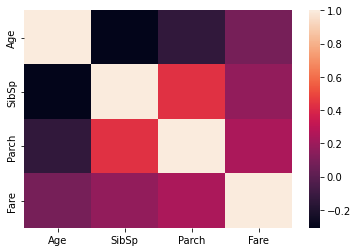

In [79]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

train_df= train_df.sample(n=400)
to_graph = train_df

to_graph['train_test'] = 1
to_heat = to_graph[['Age','SibSp','Parch','Fare']]

pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
sns.heatmap(to_heat.corr())

# Understanding the data


In [80]:

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

display(train_df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


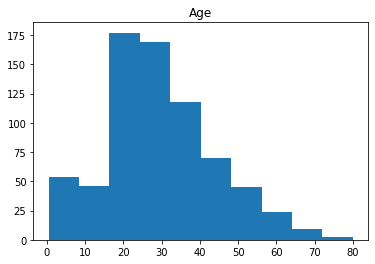

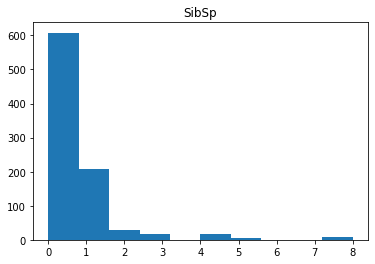

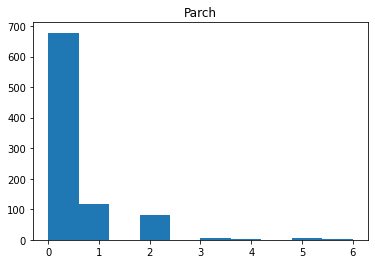

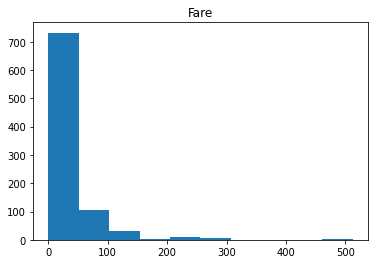

In [81]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

display(test_df)

for i in train_df[['Age','SibSp','Parch','Fare']]:
    plt.hist(train_df[i])
    plt.title(i)
    plt.show()


# Understanding data 2

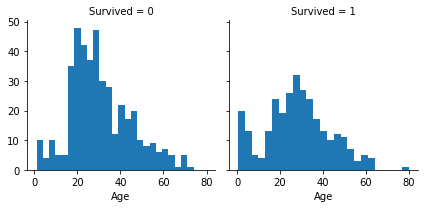

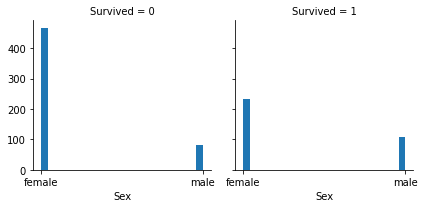

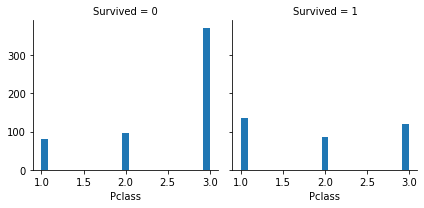

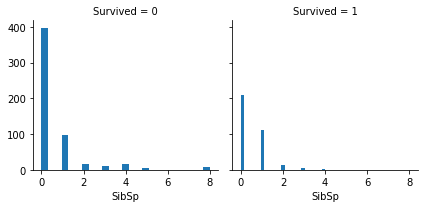

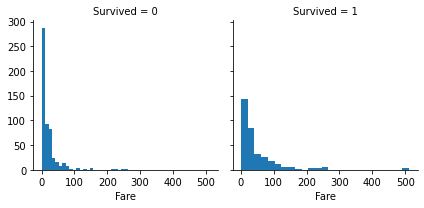

In [82]:
# Infant high survival rate
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=25)

#female high survival rate
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=25)

# People that are more wealthy are more likely to survive (ratio)
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Pclass', bins=25)

# seems to be irrelevant (same ratio)
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'SibSp', bins=25)

# People that are more wealthy are more likely to survive 
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=25)


# Data processing

In [83]:

cols = ['Name','Ticket','Cabin']
train_df = train_df.drop(cols,axis=1)
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
 dummies.append(pd.get_dummies(train_df[col]))
titanic_dummies = pd.concat(dummies, axis=1)
train_df = pd.concat((train_df,titanic_dummies),axis=1)
train_df = train_df.drop(['Pclass','Sex','Embarked'],axis=1)
train_df['Age'] = train_df['Age'].interpolate()
display(train_df)
X = train_df.values
y = train_df['Survived'].values
X = np.delete(X,1,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,889,0,22.5,1,2,23.4500,0,0,1,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


# Random Forest


In [84]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (X_train, y_train)
rfs = clf.score (X_test, y_test)
rfs

0.8134328358208955

# K-Nearest Neighbours


In [85]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = 0.01*round(knn.score(X_train, y_train) * 100, 2)
acc_knn


0.7705

# Bar Graph Representation 

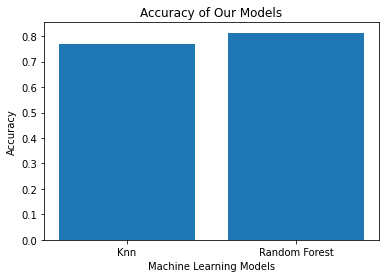

In [86]:
import matplotlib.pyplot as plt

x = ['Knn', 'Random Forest']
y = [acc_knn,rfs]

plt.bar(x,y)
plt.xlabel('Machine Learning Models')
plt.ylabel("Accuracy")
plt.title('Accuracy of Our Models')
plt.show()